In [1]:
import scipy.io
import numpy as np
import scipy as sp
from scipy import signal
import cupy as cp
import matplotlib.pyplot as plt
from SWE_utils_cupy_standalone import *
import os
import time

path = "./Parametric_tests/Test_13/"

## Load data

In [2]:
# Load datasets SSI
idx = range(13)
data_A = []  # shift -30
data_B = []  # shift 0
data_C = []  # shift 30

for i in idx:
    datasetA = sp.io.loadmat(path + 'sws_id_' + str(i) + '_shift_-30.mat') 
    datasetB = sp.io.loadmat(path + 'sws_id_' + str(i) + '_shift_0.mat') 
    datasetC = sp.io.loadmat(path + 'sws_id_' + str(i) + '_shift_30.mat') 
    dinA = datasetA["data"]     
    dinB = datasetB["data"] 
    dinC = datasetC["data"] 
    data_A.append(dinA)  
    data_B.append(dinB)  
    data_C.append(dinC)  
    
# Load datasets CUSE    
data_Af = []  

for i in range(13):
    idx = i+20
    datasetA = sp.io.loadmat(path + 'sws_id_' + str(idx) +'.mat') 
    dinA = datasetA["data"]     
    data_Af.append(dinA)  

In [3]:
data_A[0].shape

(2, 2, 250, 200)

# Print data for inspection

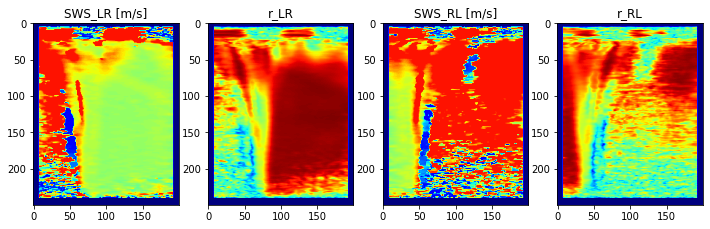

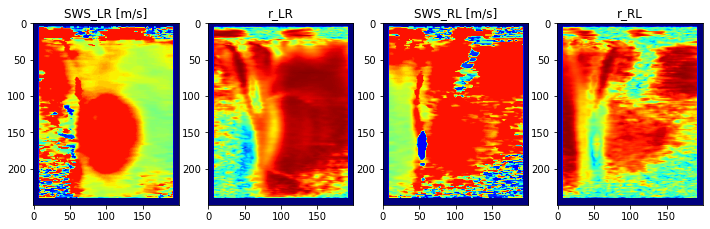

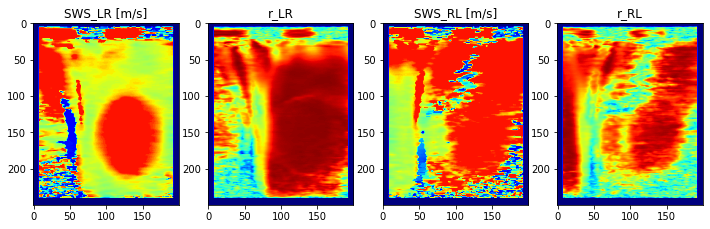

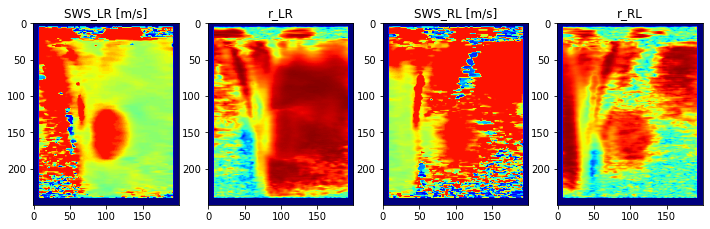

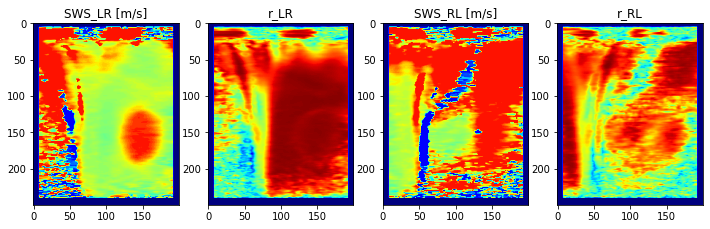

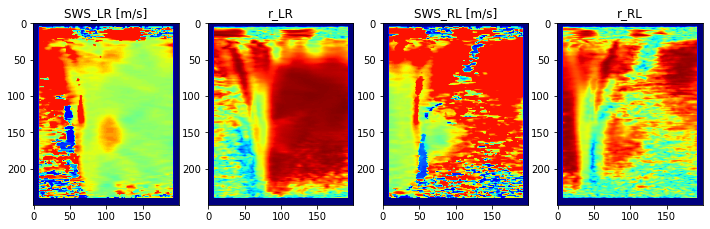

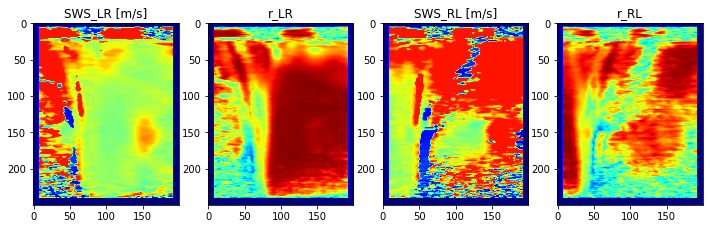

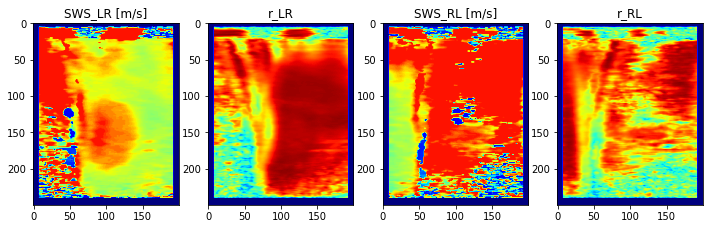

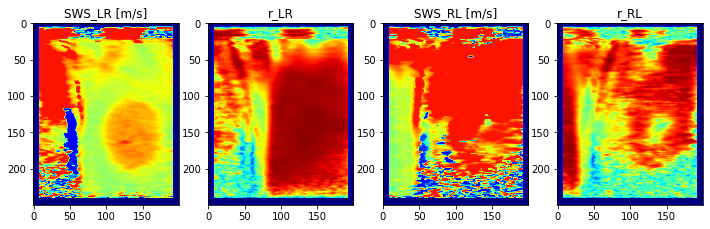

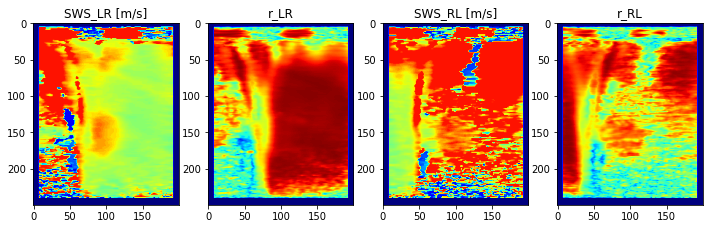

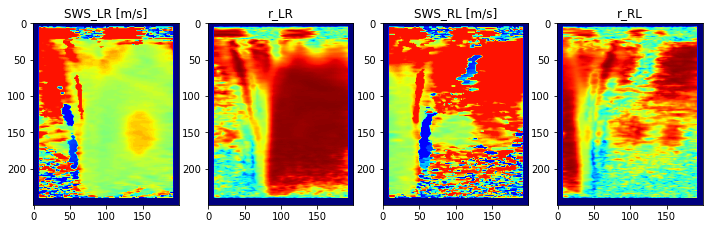

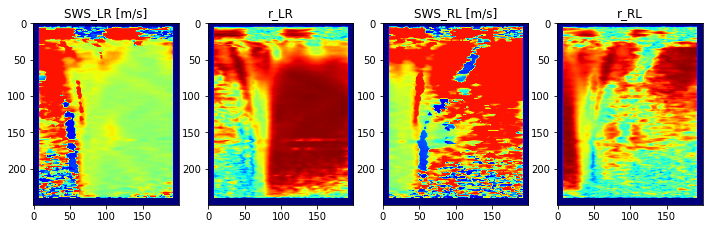

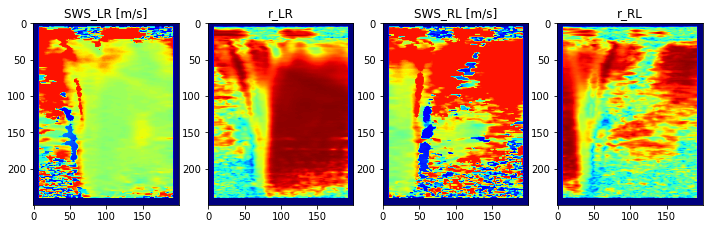

In [12]:
#Visualize the results (pre-compounding) dataset A
#Data format: 4D data: 2x 3D array: SWS: 3D array [dataset, z, x], SWS_r: 3D array [dataset, z, x]. Arrays concat'd along axis=0
pc_data = data_A

norm_sws = plt.Normalize(0, 4.5, True)
norm_r   = plt.Normalize(0, 1, True)

for i in range(len(pc_data)):
    d = pc_data[i]
    d_sws = np.squeeze(d[0, ...])
    d_r = np.squeeze(d[1, ...])
    
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 8))
    ##
    axs[0].imshow(np.squeeze(d_sws[0,:,:]), cmap='jet', norm=norm_sws)
    axs[0].set_title('SWS_LR [m/s]')

    axs[1].imshow(np.squeeze(d_r[0,:,:]), cmap='jet', norm=norm_r)
    axs[1].set_title('r_LR')

    axs[2].imshow(np.squeeze(d_sws[1,:,:]), cmap='jet', norm=norm_sws)
    axs[2].set_title('SWS_RL [m/s]')

    axs[3].imshow(np.squeeze(d_r[1,:,:]), cmap='jet', norm=norm_r)
    axs[3].set_title('r_RL')

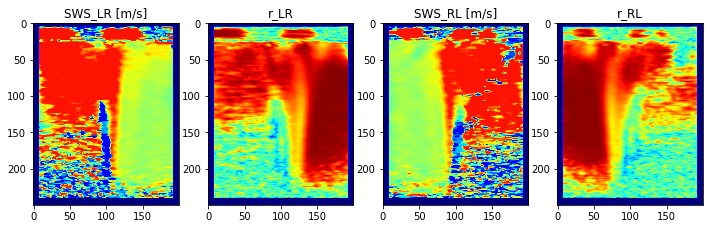

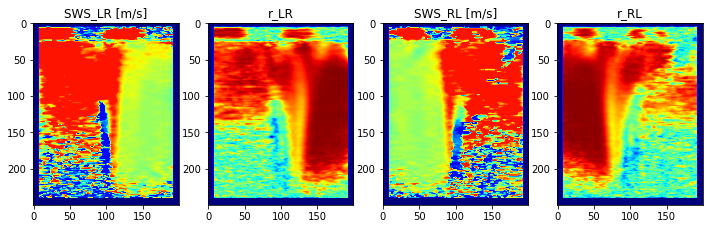

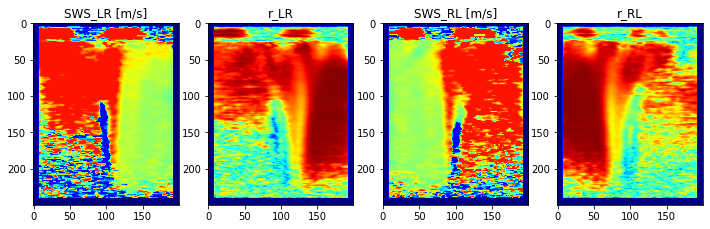

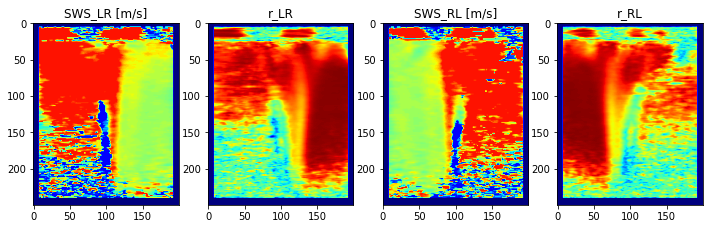

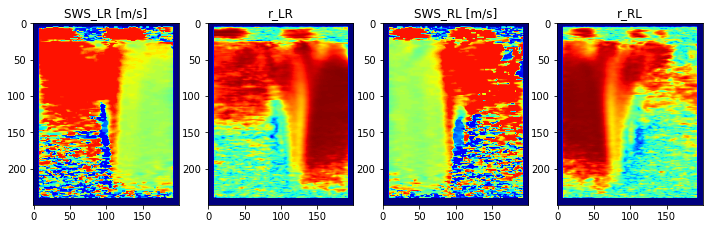

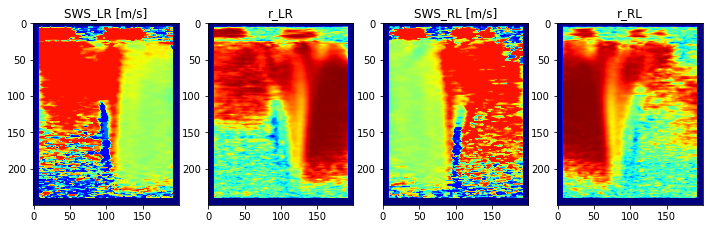

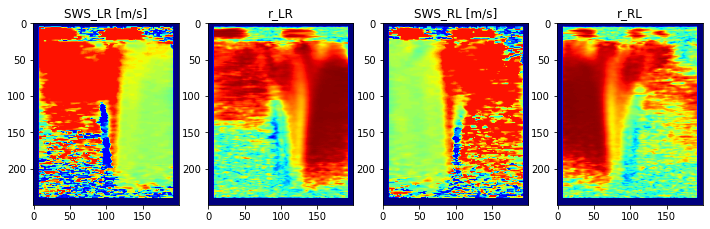

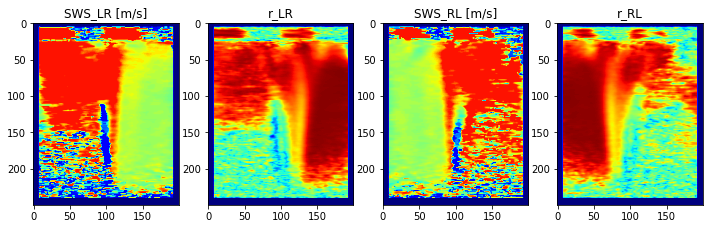

In [35]:
#Visualize the results (pre-compounding) dataset B
#Data format: 4D data: 2x 3D array: SWS: 3D array [dataset, z, x], SWS_r: 3D array [dataset, z, x]. Arrays concat'd along axis=0
pc_data = data_Bf

norm_sws = plt.Normalize(0, 4.5, True)
norm_r   = plt.Normalize(0, 1, True)

for i in range(len(pc_data)):
    d = pc_data[i]
    d_sws = np.squeeze(d[0, ...])
    d_r = np.squeeze(d[1, ...])
    
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 8))
    ##
    axs[0].imshow(np.squeeze(d_sws[0,:,:]), cmap='jet', norm=norm_sws)
    axs[0].set_title('SWS_LR [m/s]')

    axs[1].imshow(np.squeeze(d_r[0,:,:]), cmap='jet', norm=norm_r)
    axs[1].set_title('r_LR')

    axs[2].imshow(np.squeeze(d_sws[1,:,:]), cmap='jet', norm=norm_sws)
    axs[2].set_title('SWS_RL [m/s]')

    axs[3].imshow(np.squeeze(d_r[1,:,:]), cmap='jet', norm=norm_r)
    axs[3].set_title('r_RL')

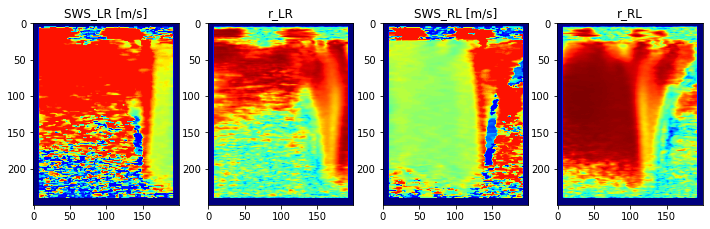

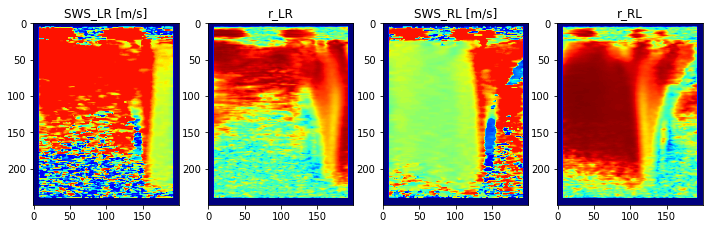

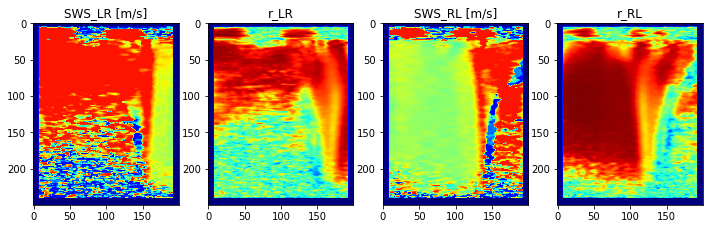

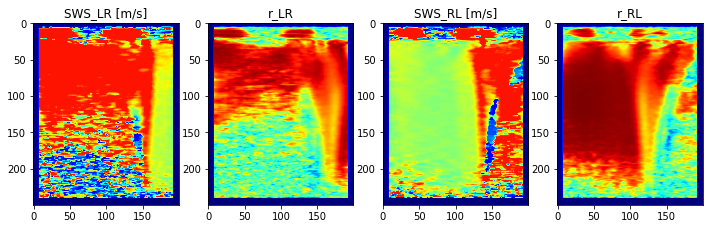

In [36]:
#Visualize the results (pre-compounding) dataset C
#Data format: 4D data: 2x 3D array: SWS: 3D array [dataset, z, x], SWS_r: 3D array [dataset, z, x]. Arrays concat'd along axis=0
pc_data = data_Cf

norm_sws = plt.Normalize(0, 4.5, True)
norm_r   = plt.Normalize(0, 1, True)

for i in range(len(pc_data)):
    d = pc_data[i]
    d_sws = np.squeeze(d[0, ...])
    d_r = np.squeeze(d[1, ...])
    
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 8))
    ##
    axs[0].imshow(np.squeeze(d_sws[0,:,:]), cmap='jet', norm=norm_sws)
    axs[0].set_title('SWS_LR [m/s]')

    axs[1].imshow(np.squeeze(d_r[0,:,:]), cmap='jet', norm=norm_r)
    axs[1].set_title('r_LR')

    axs[2].imshow(np.squeeze(d_sws[1,:,:]), cmap='jet', norm=norm_sws)
    axs[2].set_title('SWS_RL [m/s]')

    axs[3].imshow(np.squeeze(d_r[1,:,:]), cmap='jet', norm=norm_r)
    axs[3].set_title('r_RL')

## Apply masking on r-maps

In [44]:
# Settings - regions to mask to 0
A_LR = [0, 99]
A_RL = [0, 200]

B_LR = [0, 150]
B_RL = [50, 200]

C_LR = [0, 200]
C_RL = [101, 200]


# Mask the r maps in variable position dataset
for i in range(len(data_A)):
    d = data_A[i]
    d[1, 0, :, A_LR[0]:A_LR[1]] = 0
    d[1, 1, :, A_RL[0]:A_RL[1]] = 0
    data_A[i] = d
    
for i in range(len(data_B)):
    d = data_B[i]
    d[1, 0, :, B_LR[0]:B_LR[1]] = 0
    d[1, 1, :, B_RL[0]:B_RL[1]] = 0
    data_B[i] = d
    
for i in range(len(data_C)):
    d = data_C[i]
    d[1, 0, :, C_LR[0]:C_LR[1]] = 0
    d[1, 1, :, C_RL[0]:C_RL[1]] = 0
    data_C[i] = d    
    
    
# Mask the r maps in fixed position dataset
for i in range(len(data_Af)):
    d = data_Af[i]
    d[1, 0, :, A_LR[0]:A_LR[1]] = 0
    d[1, 1, :, A_RL[0]:A_RL[1]] = 0
    data_Af[i] = d
    
for i in range(len(data_Bf)):
    d = data_Bf[i]
    d[1, 0, :, B_LR[0]:B_LR[1]] = 0
    d[1, 1, :, B_RL[0]:B_RL[1]] = 0
    data_Bf[i] = d
    
for i in range(len(data_Cf)):
    d = data_Cf[i]
    d[1, 0, :, C_LR[0]:C_LR[1]] = 0
    d[1, 1, :, C_RL[0]:C_RL[1]] = 0
    data_Cf[i] = d     
    
    


## Print for inspection after masking

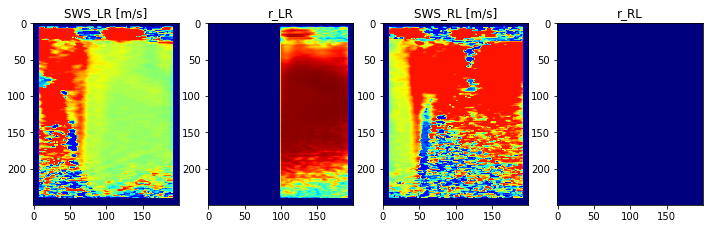

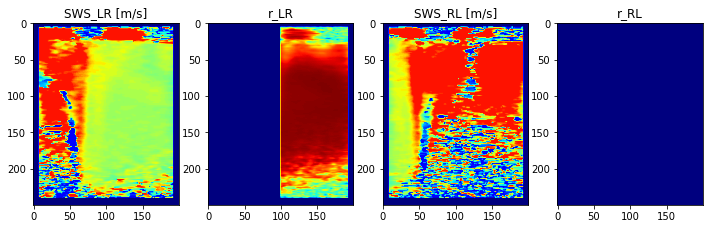

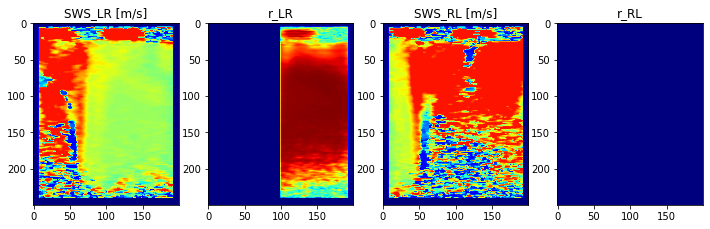

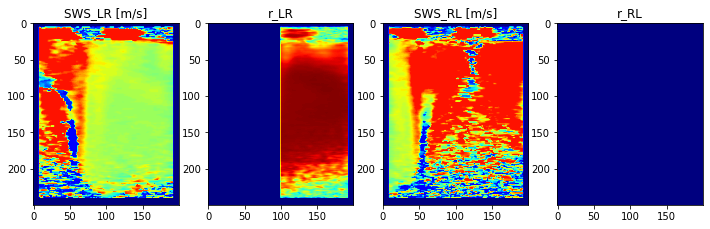

In [45]:
#Visualize the results (pre-compounding) dataset A
#Data format: 4D data: 2x 3D array: SWS: 3D array [dataset, z, x], SWS_r: 3D array [dataset, z, x]. Arrays concat'd along axis=0
pc_data = data_Af

norm_sws = plt.Normalize(0, 4.5, True)
norm_r   = plt.Normalize(0, 1, True)

for i in range(len(pc_data)):
    d = pc_data[i]
    d_sws = np.squeeze(d[0, ...])
    d_r = np.squeeze(d[1, ...])
    
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 8))
    ##
    axs[0].imshow(np.squeeze(d_sws[0,:,:]), cmap='jet', norm=norm_sws)
    axs[0].set_title('SWS_LR [m/s]')

    axs[1].imshow(np.squeeze(d_r[0,:,:]), cmap='jet', norm=norm_r)
    axs[1].set_title('r_LR')

    axs[2].imshow(np.squeeze(d_sws[1,:,:]), cmap='jet', norm=norm_sws)
    axs[2].set_title('SWS_RL [m/s]')

    axs[3].imshow(np.squeeze(d_r[1,:,:]), cmap='jet', norm=norm_r)
    axs[3].set_title('r_RL')

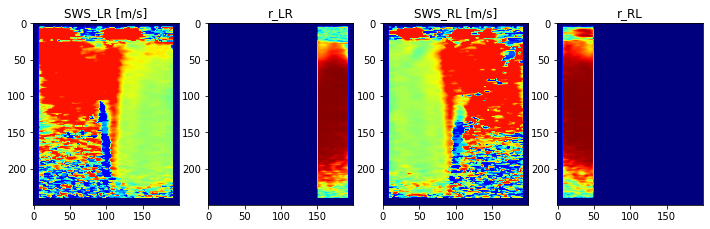

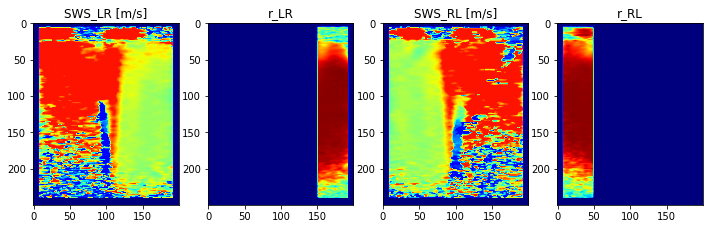

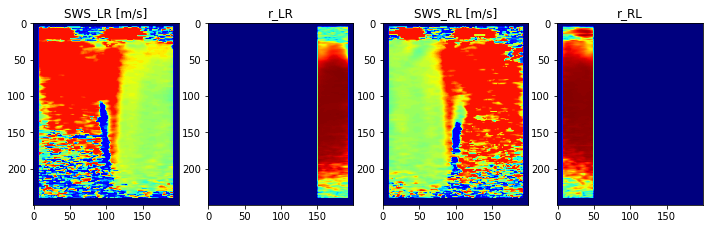

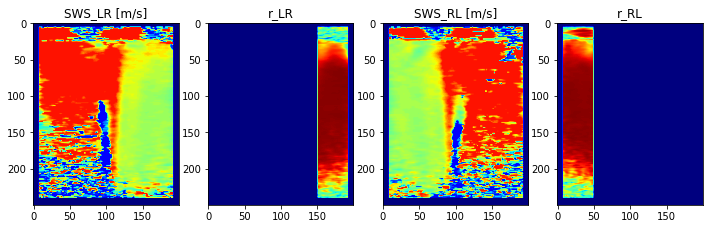

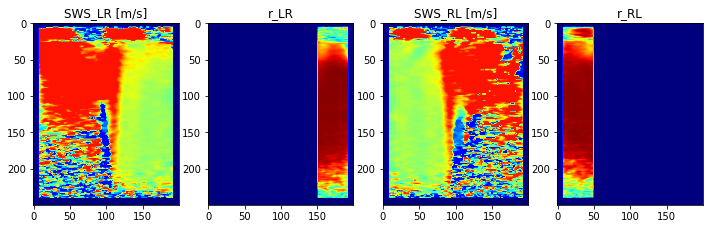

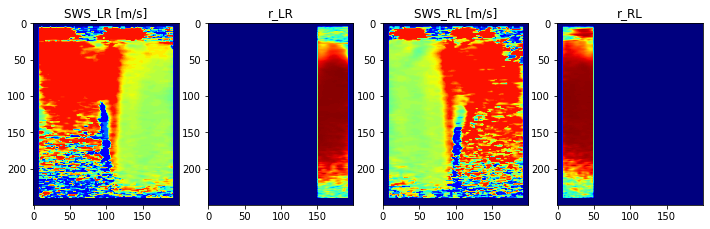

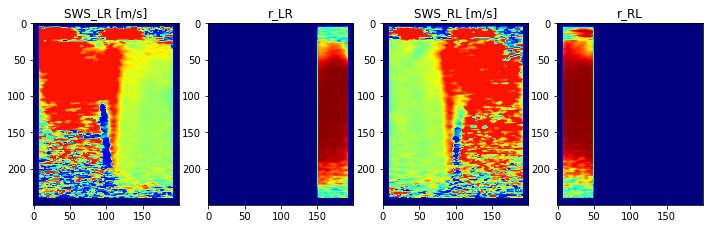

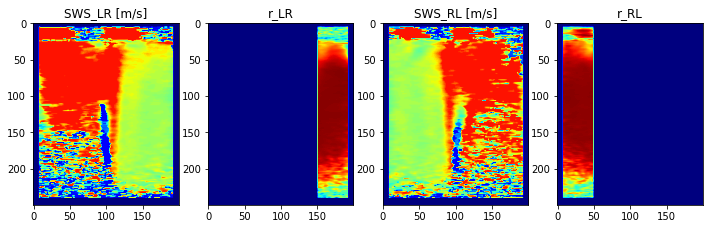

In [46]:
#Visualize the results (pre-compounding) dataset A
#Data format: 4D data: 2x 3D array: SWS: 3D array [dataset, z, x], SWS_r: 3D array [dataset, z, x]. Arrays concat'd along axis=0
pc_data = data_Bf

norm_sws = plt.Normalize(0, 4.5, True)
norm_r   = plt.Normalize(0, 1, True)

for i in range(len(pc_data)):
    d = pc_data[i]
    d_sws = np.squeeze(d[0, ...])
    d_r = np.squeeze(d[1, ...])
    
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 8))
    ##
    axs[0].imshow(np.squeeze(d_sws[0,:,:]), cmap='jet', norm=norm_sws)
    axs[0].set_title('SWS_LR [m/s]')

    axs[1].imshow(np.squeeze(d_r[0,:,:]), cmap='jet', norm=norm_r)
    axs[1].set_title('r_LR')

    axs[2].imshow(np.squeeze(d_sws[1,:,:]), cmap='jet', norm=norm_sws)
    axs[2].set_title('SWS_RL [m/s]')

    axs[3].imshow(np.squeeze(d_r[1,:,:]), cmap='jet', norm=norm_r)
    axs[3].set_title('r_RL')

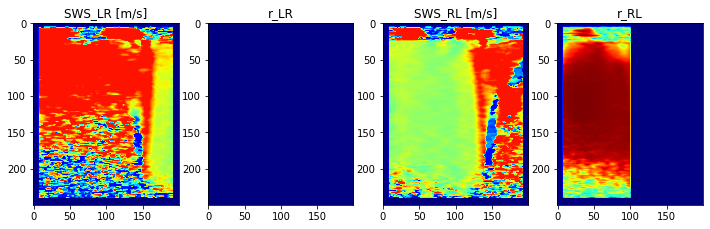

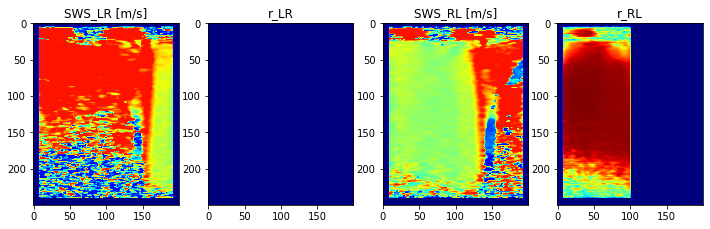

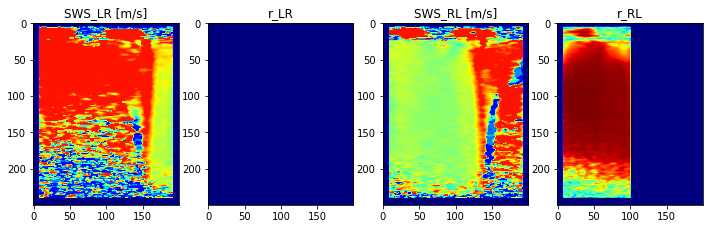

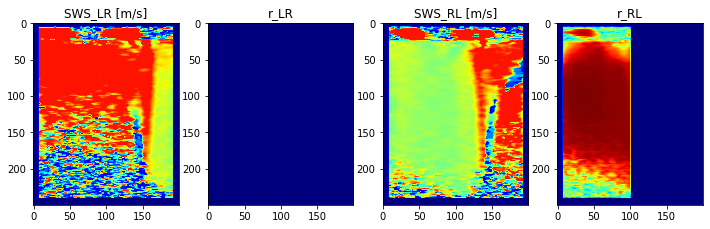

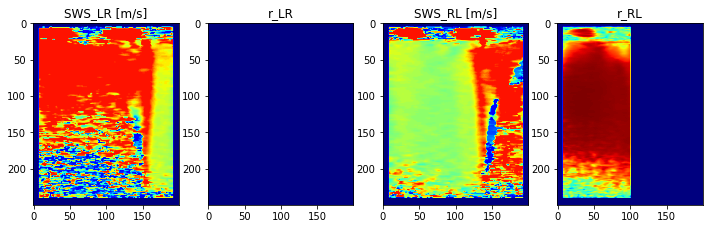

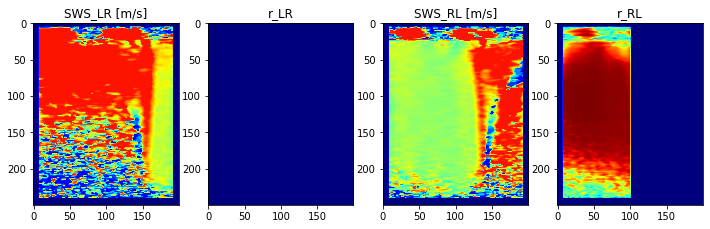

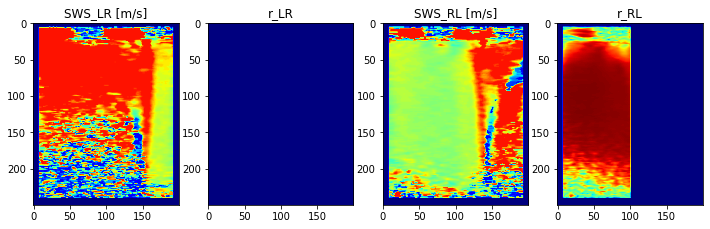

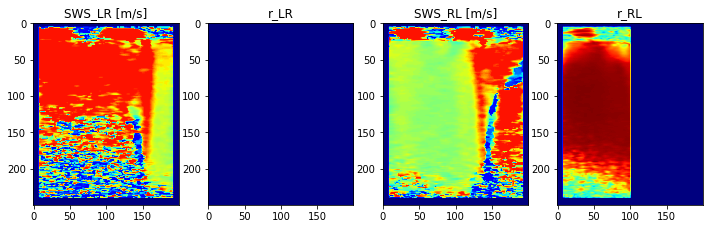

In [47]:
#Visualize the results (pre-compounding) dataset A
#Data format: 4D data: 2x 3D array: SWS: 3D array [dataset, z, x], SWS_r: 3D array [dataset, z, x]. Arrays concat'd along axis=0
pc_data = data_Cf

norm_sws = plt.Normalize(0, 4.5, True)
norm_r   = plt.Normalize(0, 1, True)

for i in range(len(pc_data)):
    d = pc_data[i]
    d_sws = np.squeeze(d[0, ...])
    d_r = np.squeeze(d[1, ...])
    
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 8))
    ##
    axs[0].imshow(np.squeeze(d_sws[0,:,:]), cmap='jet', norm=norm_sws)
    axs[0].set_title('SWS_LR [m/s]')

    axs[1].imshow(np.squeeze(d_r[0,:,:]), cmap='jet', norm=norm_r)
    axs[1].set_title('r_LR')

    axs[2].imshow(np.squeeze(d_sws[1,:,:]), cmap='jet', norm=norm_sws)
    axs[2].set_title('SWS_RL [m/s]')

    axs[3].imshow(np.squeeze(d_r[1,:,:]), cmap='jet', norm=norm_r)
    axs[3].set_title('r_RL')

## Compound final SWS maps

In [60]:
sws_maps = np.zeros([10, 250, 200]) # aggregate for final SWS variable position images
sws_maps_f = np.zeros([8, 250, 200]) # aggregate for final SWS variable position images
sws_im   = np.zeros([6, 250, 200])  # buffer for SWS maps for a single image
r_im     = np.zeros([6, 250, 200])  # buffer for r maps for a single image

for i in range(len(data_A)):
    # Load input sws maps
    sws_im[0, :, :] = data_A[i][0][0]
    sws_im[1, :, :] = data_A[i][0][1]
    sws_im[2, :, :] = data_B[i][0][0]
    sws_im[3, :, :] = data_B[i][0][1]
    sws_im[4, :, :] = data_C[i][0][0]
    sws_im[5, :, :] = data_C[i][0][1]
    
    # Load input r maps
    r_im[0, :, :] = data_A[i][1][0]
    r_im[1, :, :] = data_A[i][1][1]
    r_im[2, :, :] = data_B[i][1][0]
    r_im[3, :, :] = data_B[i][1][1]
    r_im[4, :, :] = data_C[i][1][0]
    r_im[5, :, :] = data_C[i][1][1]
    
    # Compound image
    r_sum = np.squeeze(np.sum(r_im, axis=0))
    r_sum[r_sum==0] = 10e-6
    sws_maps[i, ...] = np.sum((sws_im * r_im), axis=0) / r_sum
    
    
for i in range(len(data_Af)):
    # Load input sws maps
    sws_im[0, :, :] = data_Af[i][0][0]
    sws_im[1, :, :] = data_Af[i][0][1]
    sws_im[2, :, :] = data_Bf[i][0][0]
    sws_im[3, :, :] = data_Bf[i][0][1]
    sws_im[4, :, :] = data_Cf[i][0][0]
    sws_im[5, :, :] = data_Cf[i][0][1]
    
    # Load input r maps
    r_im[0, :, :] = data_Af[i][1][0]
    r_im[1, :, :] = data_Af[i][1][1]
    r_im[2, :, :] = data_Bf[i][1][0]
    r_im[3, :, :] = data_Bf[i][1][1]
    r_im[4, :, :] = data_Cf[i][1][0]
    r_im[5, :, :] = data_Cf[i][1][1]
    
    # Compound image
    r_sum = np.squeeze(np.sum(r_im, axis=0))
    r_sum[r_sum==0] = 10e-6
    sws_maps_f[i, ...] = np.sum((sws_im * r_im), axis=0) / r_sum    
    
    

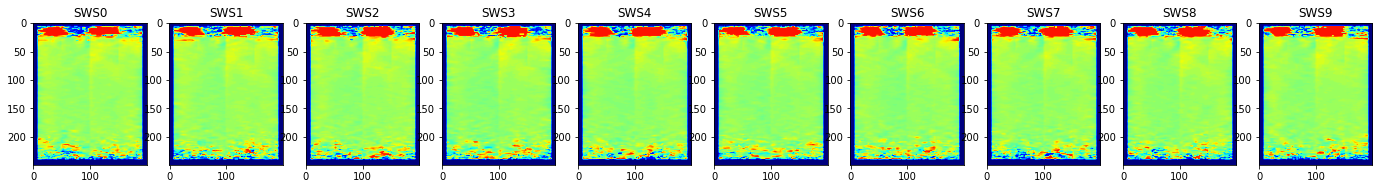

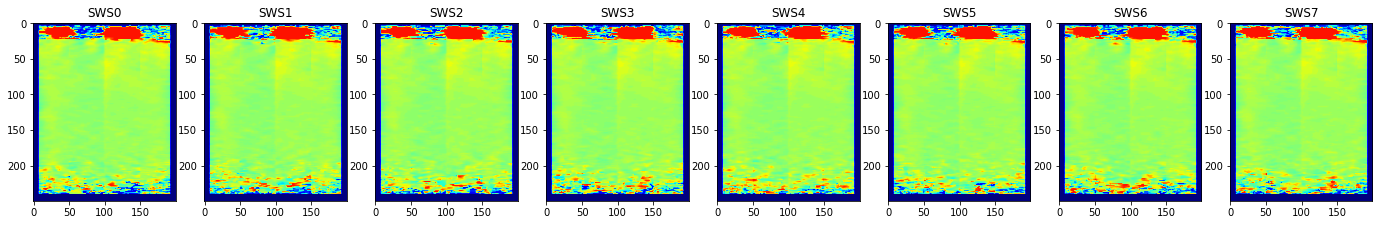

In [69]:
#Visualize the results after compounding
norm_sws = plt.Normalize(0, 4.5, True)
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(24, 10))


for i in range(10):
    axs[i].imshow(np.squeeze(sws_maps[i,:,:]), cmap='jet', norm=norm_sws)
    axs[i].set_title('SWS' + str(i))
    
fig, axs = plt.subplots(nrows=1, ncols=8, figsize=(24, 10))

for i in range(8):
    axs[i].imshow(np.squeeze(sws_maps_f[i,:,:]), cmap='jet', norm=norm_sws)
    axs[i].set_title('SWS' + str(i))


## Analyze the results

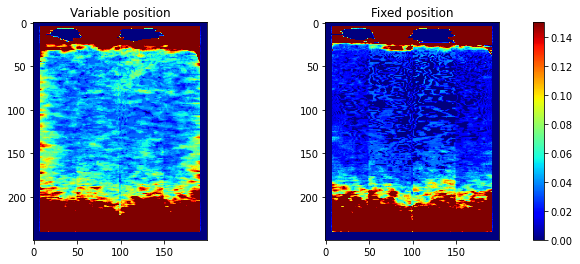

In [76]:
# Find variance maps
devA = np.std(sws_maps, axis = 0)
devB = np.std(sws_maps_f, axis = 0)

norm_stddev = plt.Normalize(0, 0.15, True)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
pcm = axs[0].imshow(devA, cmap='jet', norm=norm_stddev)
axs[0].set_title('Variable position')
axs[1].imshow(devB, cmap='jet', norm=norm_stddev)
axs[1].set_title('Fixed position')

fig.colorbar(pcm, ax=axs)



(array([7.103e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.000e+00, 3.280e+02,
        4.780e+02, 2.880e+02, 1.380e+02, 2.260e+02, 4.210e+02, 4.600e+02,
        6.270e+02, 2.750e+02, 1.860e+02, 1.310e+02, 4.920e+02, 8.560e+02,
        1.310e+02, 8.210e+02, 4.410e+02, 1.500e+02, 1.530e+02, 3.550e+02,
        7.210e+02, 6.300e+01, 7.390e+02, 1.270e+02, 6.500e+02, 1.900e+02,
        4.360e+02, 2.430e+02, 5.000e+00, 1.180e+02, 4.200e+01, 3.800e+01,
        1.100e+01, 3.200e+01, 3.600e+01, 1.200e+01, 1.200e+01, 9.000e+00,
        1.400e+01, 1.200e+01, 7.000e+00, 4.000e+00, 6.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

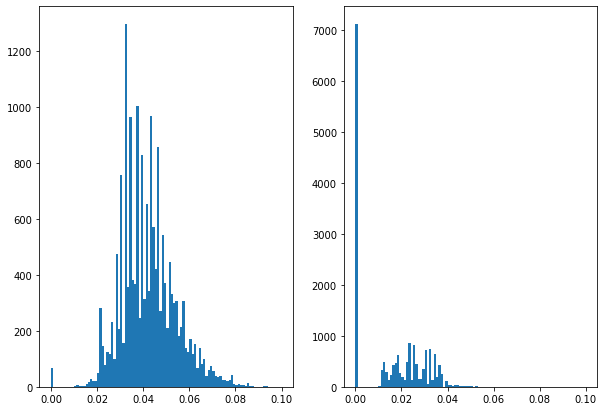

In [83]:
# Show historams of std_dev
dA = devA[50:160, 20:180]
dB = devB[50:160, 20:180]
n_bins = 100

fig, axs = plt.subplots(1, 2, figsize =(10, 7), tight_layout = False)
 
axs[0].hist(dA.flatten(), bins = n_bins, range=[0, 0.1])
axs[1].hist(dB.flatten(), bins = n_bins, range=[0, 0.1])

In [82]:
# Average variance in ROI
avg_devA = np.mean(dA.flatten()) 
avg_devB = np.mean(dB.flatten())

print(avg_devA)
print(avg_devB)

0.04218162098105802
0.015114991056427033


## Averaging experiment

In [90]:
avg_idx = range(10)
avg_devs = np.zeros(10)

data = sws_maps[:, 50:160, 20:180]

for i in range(10):
    P = np.mean(data[0:i+1, ...], axis=0)
    avg_devs[i] = np.std(P.flatten())


In [92]:
print(avg_devs)

[0.08334913 0.08357278 0.08345681 0.08483087 0.08283713 0.08086344
 0.07982618 0.07875118 0.0797284  0.08008571]
